<a href="https://colab.research.google.com/github/giovanni-lucarelli/basket/blob/main/basket.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [10]:
import pandas as pd

url = "https://raw.githubusercontent.com/giovanni-lucarelli/basket/main/games.csv"  # Sostituisci con il link del tuo file
df = pd.read_csv(url)

print(df.head())  # Stampa le prime righe del dataframe per verificare il caricamento

  GAME_DATE_EST   GAME_ID GAME_STATUS_TEXT  HOME_TEAM_ID  VISITOR_TEAM_ID  \
0    2022-12-22  22200477            Final    1610612740       1610612759   
1    2022-12-22  22200478            Final    1610612762       1610612764   
2    2022-12-21  22200466            Final    1610612739       1610612749   
3    2022-12-21  22200467            Final    1610612755       1610612765   
4    2022-12-21  22200468            Final    1610612737       1610612741   

   SEASON  TEAM_ID_home  PTS_home  FG_PCT_home  FT_PCT_home  ...  AST_home  \
0    2022    1610612740     126.0        0.484        0.926  ...      25.0   
1    2022    1610612762     120.0        0.488        0.952  ...      16.0   
2    2022    1610612739     114.0        0.482        0.786  ...      22.0   
3    2022    1610612755     113.0        0.441        0.909  ...      27.0   
4    2022    1610612737     108.0        0.429        1.000  ...      22.0   

   REB_home  TEAM_ID_away  PTS_away  FG_PCT_away  FT_PCT_away  FG3_P

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26651 entries, 0 to 26650
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   GAME_DATE_EST     26651 non-null  object 
 1   GAME_ID           26651 non-null  int64  
 2   GAME_STATUS_TEXT  26651 non-null  object 
 3   HOME_TEAM_ID      26651 non-null  int64  
 4   VISITOR_TEAM_ID   26651 non-null  int64  
 5   SEASON            26651 non-null  int64  
 6   TEAM_ID_home      26651 non-null  int64  
 7   PTS_home          26552 non-null  float64
 8   FG_PCT_home       26552 non-null  float64
 9   FT_PCT_home       26552 non-null  float64
 10  FG3_PCT_home      26552 non-null  float64
 11  AST_home          26552 non-null  float64
 12  REB_home          26552 non-null  float64
 13  TEAM_ID_away      26651 non-null  int64  
 14  PTS_away          26552 non-null  float64
 15  FG_PCT_away       26552 non-null  float64
 16  FT_PCT_away       26552 non-null  float6

In [12]:
nan_counts = df.isna().sum()
print(nan_counts)

GAME_DATE_EST        0
GAME_ID              0
GAME_STATUS_TEXT     0
HOME_TEAM_ID         0
VISITOR_TEAM_ID      0
SEASON               0
TEAM_ID_home         0
PTS_home            99
FG_PCT_home         99
FT_PCT_home         99
FG3_PCT_home        99
AST_home            99
REB_home            99
TEAM_ID_away         0
PTS_away            99
FG_PCT_away         99
FT_PCT_away         99
FG3_PCT_away        99
AST_away            99
REB_away            99
HOME_TEAM_WINS       0
dtype: int64


In [13]:
nan_rows = df[df.isna().any(axis=1)]
print(nan_rows["GAME_DATE_EST"].unique())
# 2 weeks of missing data

['2003-10-24' '2003-10-23' '2003-10-22' '2003-10-21' '2003-10-20'
 '2003-10-19' '2003-10-18' '2003-10-17' '2003-10-16' '2003-10-15'
 '2003-10-14' '2003-10-13' '2003-10-12' '2003-10-11' '2003-10-10'
 '2003-10-09' '2003-10-08' '2003-10-07']


In [14]:
df = df.dropna()
df['GAME_STATUS_TEXT'].unique()
df = df.drop(columns=['GAME_STATUS_TEXT'])

Check for identical rows:

In [15]:
print(len(df))
print(len(df["GAME_ID"].unique()))

26552
26523


In [16]:
# prompt: find all couples of rows that have the same GAME_ID and print the subtraction only between the different values of the two rows, not the differences for the whole rows

# Group by GAME_ID and find couples of rows with the same GAME_ID
for game_id, group in df.groupby("GAME_ID"):
  if len(group) > 1:
    # Iterate through all possible pairs of rows within the group
    for i in range(len(group)):
      for j in range(i + 1, len(group)):
        row1 = group.iloc[i]
        row2 = group.iloc[j]

        # Compare the values of each column and print the differences
        #print(f"Game ID: {game_id}, Comparing rows {i} and {j}:")
        for col in df.columns:
          # Check if the column values are numeric and different
          if (row1[col] != row2[col]) and (pd.api.types.is_numeric_dtype(row1[col]) and pd.api.types.is_numeric_dtype(row2[col])):
            # Calculate the absolute difference and apply threshold
            if (abs(row1[col]-row2[col])>math.exp(-10)): #Changed math.abs to abs
              print(f"  {col}: {row1[col]} - {row2[col]} = {row1[col] - row2[col]}")
            else:
              print("No difference")

NameError: name 'math' is not defined

In [17]:
# prompt: find all couples of rows that have the same GAME_ID and keep only the first one (delete the other)
# Group by GAME_ID and keep only the first row for each group
df = df.groupby("GAME_ID").first().reset_index()
df.head()

,GAME_ID,GAME_DATE_EST,HOME_TEAM_ID,VISITOR_TEAM_ID,SEASON,TEAM_ID_home,PTS_home,FG_PCT_home,FT_PCT_home,FG3_PCT_home,AST_home,REB_home,TEAM_ID_away,PTS_away,FG_PCT_away,FT_PCT_away,FG3_PCT_away,AST_away,REB_away,HOME_TEAM_WINS
0,10300001,2003-10-05,1610612762,1610612742,2003,1610612762,90.0,0.457,0.735,0.143,23.0,41.0,1610612742,85.0,0.447,0.500,0.250,20.0,38.0,1
1,10300002,2003-10-06,1610612763,1610612749,2003,1610612763,105.0,0.494,0.618,0.267,25.0,48.0,1610612749,94.0,0.427,0.700,0.154,20.0,43.0,1
2,10300003,2003-10-07,1610612765,1610612739,2003,1610612765,96.0,0.391,0.600,0.444,19.0,37.0,1610612739,100.0,0.494,0.690,0.667,25.0,52.0,0
3,10300004,2003-10-07,1610612742,1610612753,2003,1610612742,99.0,0.488,0.667,0.167,20.0,52.0,1610612753,89.0,0.408,0.727,0.350,15.0,34.0,1
4,10300005,2003-10-07,1610612757,1610612745,2003,1610612757,104.0,0.527,0.657,0.429,22.0,33.0,1610612745,80.0,0.470,0.667,0.333,10.0,37.0,1


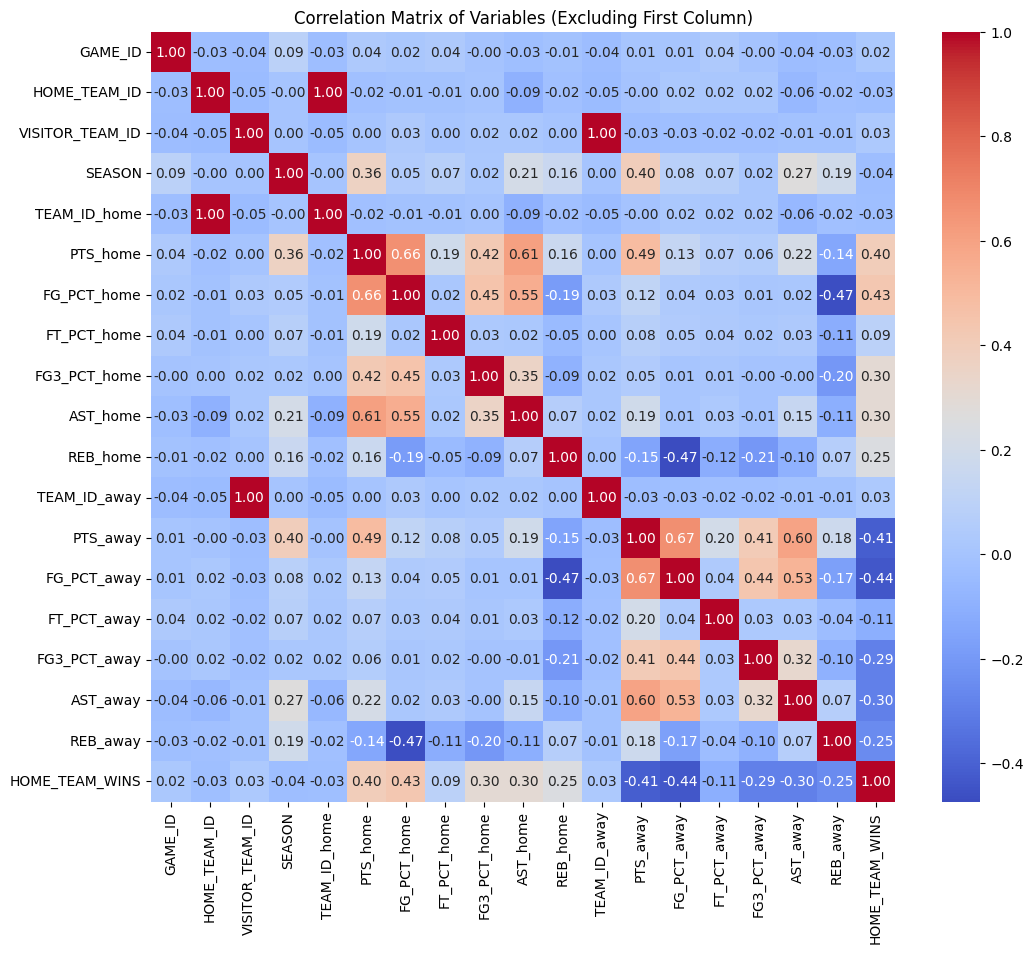

In [18]:
# prompt: correlation matrix between all variables except second column and seaborn correlation matrix graph

import seaborn as sns
import matplotlib.pyplot as plt

# Calculate the correlation matrix for all columns except the first one
correlation_matrix = df.drop(df.columns[1], axis=1).corr()

# Create a heatmap of the correlation matrix
plt.figure(figsize=(12, 10))  # Adjust figure size as needed
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Variables (Excluding First Column)')
plt.show()

In [19]:
df = df.drop(columns=['TEAM_ID_home','TEAM_ID_away', "SEASON"])
df.columns

Index(['GAME_ID', 'GAME_DATE_EST', 'HOME_TEAM_ID', 'VISITOR_TEAM_ID',
       'PTS_home', 'FG_PCT_home', 'FT_PCT_home', 'FG3_PCT_home', 'AST_home',
       'REB_home', 'PTS_away', 'FG_PCT_away', 'FT_PCT_away', 'FG3_PCT_away',
       'AST_away', 'REB_away', 'HOME_TEAM_WINS'],
      dtype='object')

In [20]:
df_sorted = df.sort_values(by='GAME_DATE_EST')

In [ ]:
df_sorted.tail()

,GAME_ID,GAME_DATE_EST,HOME_TEAM_ID,VISITOR_TEAM_ID,PTS_home,FG_PCT_home,FT_PCT_home,FG3_PCT_home,AST_home,REB_home,PTS_away,FG_PCT_away,FT_PCT_away,FG3_PCT_away,AST_away,REB_away,HOME_TEAM_WINS
24908,22200468,2022-12-21,1610612737,1610612741,108.0,0.429,1.000,0.378,22.0,47.0,110.0,0.500,0.773,0.292,20.0,47.0,0
24906,22200466,2022-12-21,1610612739,1610612749,114.0,0.482,0.786,0.313,22.0,37.0,106.0,0.470,0.682,0.433,20.0,46.0,1
24911,22200471,2022-12-21,1610612752,1610612761,106.0,0.553,0.611,0.423,25.0,38.0,113.0,0.447,0.909,0.265,17.0,38.0,0
24918,22200478,2022-12-22,1610612762,1610612764,120.0,0.488,0.952,0.457,16.0,40.0,112.0,0.561,0.765,0.333,20.0,37.0,1
24917,22200477,2022-12-22,1610612740,1610612759,126.0,0.484,0.926,0.382,25.0,46.0,117.0,0.478,0.815,0.321,23.0,44.0,1


In [21]:
game_id = 	22200468
home_team_id = 1610612737
game_date = "2022-12-21"
# Find the 5 previous games for the same home team
previous_games = df_sorted[
(df_sorted['GAME_DATE_EST'] < game_date) &
((df_sorted['HOME_TEAM_ID'] == home_team_id) | (df_sorted['VISITOR_TEAM_ID'] == home_team_id)) &
(df_sorted['GAME_ID'] != game_id)
].sort_values(by='GAME_DATE_EST', ascending=False).head(5)

previous_games

,GAME_ID,GAME_DATE_EST,HOME_TEAM_ID,VISITOR_TEAM_ID,PTS_home,FG_PCT_home,FT_PCT_home,FG3_PCT_home,AST_home,REB_home,PTS_away,FG_PCT_away,FT_PCT_away,FG3_PCT_away,AST_away,REB_away,HOME_TEAM_WINS
24894,22200454,2022-12-19,1610612737,1610612753,126.0,0.511,0.900,0.375,29.0,41.0,125.0,0.474,0.920,0.353,29.0,45.0,1
24868,22200428,2022-12-16,1610612766,1610612737,106.0,0.398,0.684,0.349,26.0,43.0,125.0,0.547,0.824,0.517,25.0,41.0,0
24856,22200416,2022-12-14,1610612753,1610612737,135.0,0.505,0.833,0.444,28.0,46.0,124.0,0.500,0.889,0.343,30.0,39.0,1
24844,22200404,2022-12-12,1610612763,1610612737,128.0,0.602,0.833,0.406,36.0,49.0,103.0,0.356,0.773,0.324,20.0,39.0,1
24840,22200400,2022-12-11,1610612737,1610612741,123.0,0.480,0.762,0.333,28.0,45.0,122.0,0.480,0.826,0.259,28.0,53.0,1


In [ ]:
# prompt: create a new dataframe where for each unique "GAME_ID" find the previous (in order of time, as indicated by "GAME_DATE_EST") 5 games in which the same "HOME_TEAM_ID" played (it could be present in "HOME_TEAM_ID" or in "VISITOR_TEAM_ID"). For these 5 games, compute a column that has the mean of  "PTS_home" if you found the id in "HOME_TEAM_ID" or the mean of "PTS_away" if you found the id in "VISITOR_TEAM_ID"

import pandas as pd

# Assuming 'df' is your DataFrame from the previous code

def get_previous_games_stats(df):
    # Create an empty list to store the results
    results = []

    for index, row in df_sorted.iterrows():
        game_id = row['GAME_ID']
        home_team_id = row['HOME_TEAM_ID']
        away_team_id = row['VISITOR_TEAM_ID']
        game_date = row['GAME_DATE_EST']
        home_wins = row["HOME_TEAM_WINS"]

        # Find the 5 previous games for the same home team
        previous_games_home = df_sorted[
            (df_sorted['GAME_DATE_EST'] < game_date) &
            ((df_sorted['HOME_TEAM_ID'] == home_team_id) | (df_sorted['VISITOR_TEAM_ID'] == home_team_id)) &
            (df_sorted['GAME_ID'] != game_id)
        ].sort_values(by='GAME_DATE_EST', ascending=False).head(5)

        # same away team
        previous_games_away = df_sorted[
            (df_sorted['GAME_DATE_EST'] < game_date) &
            ((df_sorted['HOME_TEAM_ID'] == away_team_id) | (df_sorted['VISITOR_TEAM_ID'] == away_team_id)) &
            (df_sorted['GAME_ID'] != game_id)
        ].sort_values(by='GAME_DATE_EST', ascending=False).head(5)

        # Calculate the mean of PTS_home or PTS_away for previous games for home team
        previous_game_stats_home = []
        for prev_index, prev_row in previous_games_home.iterrows():
          if prev_row['HOME_TEAM_ID'] == home_team_id:
            previous_game_stats_home.append(prev_row['PTS_home']-prev_row['PTS_away'])
          else:
            previous_game_stats_home.append(prev_row['PTS_away']-prev_row['PTS_home'])

        mean_previous_pts_home = sum(previous_game_stats_home) / len(previous_game_stats_home) if len(previous_game_stats_home)==5 else None

        # Calculate the mean of PTS_home or PTS_away for previous games for home team
        previous_game_stats_away = []
        for prev_index, prev_row in previous_games_away.iterrows():
          if prev_row['HOME_TEAM_ID'] == away_team_id:
            previous_game_stats_away.append(prev_row['PTS_home']-prev_row['PTS_away'])
          else:
            previous_game_stats_away.append(prev_row['PTS_away']-prev_row['PTS_home'])

        mean_previous_pts_away = sum(previous_game_stats_away) / len(previous_game_stats_away) if len(previous_game_stats_away)==5 else None

        #####################################################################################################################################

        results.append({
            'GAME_ID': game_id,
            'HOME_TEAM_ID': home_team_id,
            'VISITOR_TEAM_ID': away_team_id,
            'GAME_DATE_EST': game_date,
            'Mean_PTS_Last_5_Games': mean_previous_pts_home,
            'Mean_PTS_Away_Last_5_Games': mean_previous_pts_away,
            'HOME_TEAM_WINS': home_wins
        })

    return pd.DataFrame(results)

# Create the new DataFrame with previous game statistics
new_df_prev_games = get_previous_games_stats(df)

# Display the resulting DataFrame
print(new_df_prev_games.info)


<bound method DataFrame.info of         GAME_ID  HOME_TEAM_ID  VISITOR_TEAM_ID GAME_DATE_EST  \
0      10300001    1610612762       1610612742    2003-10-05   
1      10300002    1610612763       1610612749    2003-10-06   
2      10300009    1610612758       1610612746    2003-10-07   
3      10300008    1610612756       1610612751    2003-10-07   
4      10300007    1610612748       1610612755    2003-10-07   
...         ...           ...              ...           ...   
26518  22200468    1610612737       1610612741    2022-12-21   
26519  22200466    1610612739       1610612749    2022-12-21   
26520  22200471    1610612752       1610612761    2022-12-21   
26521  22200478    1610612762       1610612764    2022-12-22   
26522  22200477    1610612740       1610612759    2022-12-22   

       Mean_PTS_Last_5_Games  Mean_PTS_Away_Last_5_Games  HOME_TEAM_WINS  
0                        NaN                         NaN               1  
1                        NaN                     

In [ ]:
print(new_df_prev_games.info())
new_df_prev_games = new_df_prev_games.dropna()
new_df_prev_games.head(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26523 entries, 0 to 26522
Data columns (total 2 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Mean_PTS_Last_5_Games       26445 non-null  float64
 1   Mean_PTS_Away_Last_5_Games  26451 non-null  float64
dtypes: float64(2)
memory usage: 414.5 KB
None


,Mean_PTS_Last_5_Games,Mean_PTS_Away_Last_5_Games
66,88.2,94.0
67,87.6,103.4
68,86.8,73.2
77,89.0,80.8
79,82.8,92.2
80,87.0,90.0
82,95.2,98.6
84,94.2,106.4
86,85.8,87.0
87,86.8,76.2


In [ ]:
def get_sum_victories(df):
    # Create an empty list to store the results
    results = []

    for index, row in df_sorted.iterrows():
        game_id = row['GAME_ID']
        home_team_id = row['HOME_TEAM_ID']
        away_team_id = row['VISITOR_TEAM_ID']
        game_date = row['GAME_DATE_EST']

        # Find the 5 previous games for the same home team
        previous_games_home = df_sorted[
            (df_sorted['GAME_DATE_EST'] < game_date) &
            ((df_sorted['HOME_TEAM_ID'] == home_team_id) | (df_sorted['VISITOR_TEAM_ID'] == home_team_id)) &
            (df_sorted['GAME_ID'] != game_id)
        ].sort_values(by='GAME_DATE_EST', ascending=False).head(5)

        # same away team
        previous_games_away = df_sorted[
            (df_sorted['GAME_DATE_EST'] < game_date) &
            ((df_sorted['HOME_TEAM_ID'] == away_team_id) | (df_sorted['VISITOR_TEAM_ID'] == away_team_id)) &
            (df_sorted['GAME_ID'] != game_id)
        ].sort_values(by='GAME_DATE_EST', ascending=False).head(5)

        # Calculate the mean of PTS_home or PTS_away for previous games for home team
        previous_game_stats_home = []
        for prev_index, prev_row in previous_games_home.iterrows():
          if prev_row['HOME_TEAM_ID'] == home_team_id:
            previous_game_stats_home.append(prev_row['HOME_TEAM_WINS'])
          else:
            previous_game_stats_home.append(1 - prev_row['HOME_TEAM_WINS'])

        sum_victories_home = sum(previous_game_stats_home) if len(previous_game_stats_home)==5 else None

        # Calculate the mean of PTS_home or PTS_away for previous games for home team
        previous_game_stats_away = []
        for prev_index, prev_row in previous_games_away.iterrows():
          if prev_row['HOME_TEAM_ID'] == away_team_id:
            previous_game_stats_away.append(prev_row['HOME_TEAM_WINS'])
          else:
            previous_game_stats_away.append(1 - prev_row['HOME_TEAM_WINS'])

        sum_victories_away = sum(previous_game_stats_away) if len(previous_game_stats_away)==5 else None

        #####################################################################################################################################

        results.append({
            'GAME_ID': game_id,
            'HOME_TEAM_ID': home_team_id,
            'VISITOR_TEAM_ID': away_team_id,
            'GAME_DATE_EST': game_date,
            'Number_of_victories_Home': sum_victories_home,
            'Number_of_victories_Away': sum_victories_away
        })

    return pd.DataFrame(results)

  # Create the new DataFrame with previous game statistics
sum_games = get_sum_victories(df)

# Display the resulting DataFrame
print(sum_games.info)

<bound method DataFrame.info of         GAME_ID  HOME_TEAM_ID  VISITOR_TEAM_ID GAME_DATE_EST  \
0      10300001    1610612762       1610612742    2003-10-05   
1      10300002    1610612763       1610612749    2003-10-06   
2      10300009    1610612758       1610612746    2003-10-07   
3      10300008    1610612756       1610612751    2003-10-07   
4      10300007    1610612748       1610612755    2003-10-07   
...         ...           ...              ...           ...   
26518  22200468    1610612737       1610612741    2022-12-21   
26519  22200466    1610612739       1610612749    2022-12-21   
26520  22200471    1610612752       1610612761    2022-12-21   
26521  22200478    1610612762       1610612764    2022-12-22   
26522  22200477    1610612740       1610612759    2022-12-22   

       Number_of_victories_Home  Number_of_victories_Away  
0                           NaN                       NaN  
1                           NaN                       NaN  
2                  

In [ ]:
merged_df = pd.concat([new_df_prev_games, sum_games], axis=1, join='inner')

# Display the merged dataframe
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26523 entries, 0 to 26522
Data columns (total 13 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   GAME_ID                     26523 non-null  int64  
 1   HOME_TEAM_ID                26523 non-null  int64  
 2   VISITOR_TEAM_ID             26523 non-null  int64  
 3   GAME_DATE_EST               26523 non-null  object 
 4   Mean_PTS_Last_5_Games       26445 non-null  float64
 5   Mean_PTS_Away_Last_5_Games  26451 non-null  float64
 6   HOME_TEAM_WINS              26523 non-null  int64  
 7   GAME_ID                     26523 non-null  int64  
 8   HOME_TEAM_ID                26523 non-null  int64  
 9   VISITOR_TEAM_ID             26523 non-null  int64  
 10  GAME_DATE_EST               26523 non-null  object 
 11  Number_of_victories_Home    26445 non-null  float64
 12  Number_of_victories_Away    26451 non-null  float64
dtypes: float64(4), int64(7), object

In [ ]:
def get_mean_rebounds(df):
       # Create an empty list to store the results
    results = []

    for index, row in df_sorted.iterrows():
        game_id = row['GAME_ID']
        home_team_id = row['HOME_TEAM_ID']
        away_team_id = row['VISITOR_TEAM_ID']
        game_date = row['GAME_DATE_EST']
        home_wins = row["HOME_TEAM_WINS"]

        # Find the 5 previous games for the same home team
        previous_games_home = df_sorted[
            (df_sorted['GAME_DATE_EST'] < game_date) &
            ((df_sorted['HOME_TEAM_ID'] == home_team_id) | (df_sorted['VISITOR_TEAM_ID'] == home_team_id)) &
            (df_sorted['GAME_ID'] != game_id)
        ].sort_values(by='GAME_DATE_EST', ascending=False).head(5)

        # same away team
        previous_games_away = df_sorted[
            (df_sorted['GAME_DATE_EST'] < game_date) &
            ((df_sorted['HOME_TEAM_ID'] == away_team_id) | (df_sorted['VISITOR_TEAM_ID'] == away_team_id)) &
            (df_sorted['GAME_ID'] != game_id)
        ].sort_values(by='GAME_DATE_EST', ascending=False).head(5)

        # Calculate the mean of rebounds_home or rebounds_away for previous games for home team
        previous_game_stats_home = []
        for prev_index, prev_row in previous_games_home.iterrows():
          if prev_row['HOME_TEAM_ID'] == home_team_id:
            previous_game_stats_home.append(prev_row['REB_home']-prev_row['REB_away'])
          else:
            previous_game_stats_home.append(prev_row['REB_away']-prev_row['REB_home'])

        mean_previous_pts_home = sum(previous_game_stats_home) / len(previous_game_stats_home) if len(previous_game_stats_home)==5 else None

        # Calculate the mean of PTS_home or PTS_away for previous games for home team
        previous_game_stats_away = []
        for prev_index, prev_row in previous_games_away.iterrows():
          if prev_row['HOME_TEAM_ID'] == away_team_id:
            previous_game_stats_away.append(prev_row['REB_home']-prev_row['REB_away'])
          else:
            previous_game_stats_away.append(prev_row['REB_away']-prev_row['REB_home'])

        mean_previous_pts_away = sum(previous_game_stats_away) / len(previous_game_stats_away) if len(previous_game_stats_away)==5 else None

        #####################################################################################################################################

        results.append({
            'GAME_ID': game_id,
            'HOME_TEAM_ID': home_team_id,
            'VISITOR_TEAM_ID': away_team_id,
            'GAME_DATE_EST': game_date,
            'Mean_REB_Last_5_Games': mean_previous_pts_home,
            'Mean_REB_Away_Last_5_Games': mean_previous_pts_away,
            'HOME_TEAM_WINS': home_wins
        })

    return pd.DataFrame(results)

  # Create the new DataFrame with previous game statistics
mean_rebounds = get_mean_rebounds(df)

# Display the resulting DataFrame
print(mean_rebounds.info)

<bound method DataFrame.info of         GAME_ID  HOME_TEAM_ID  VISITOR_TEAM_ID GAME_DATE_EST  \
0      10300001    1610612762       1610612742    2003-10-05   
1      10300002    1610612763       1610612749    2003-10-06   
2      10300009    1610612758       1610612746    2003-10-07   
3      10300008    1610612756       1610612751    2003-10-07   
4      10300007    1610612748       1610612755    2003-10-07   
...         ...           ...              ...           ...   
26518  22200468    1610612737       1610612741    2022-12-21   
26519  22200466    1610612739       1610612749    2022-12-21   
26520  22200471    1610612752       1610612761    2022-12-21   
26521  22200478    1610612762       1610612764    2022-12-22   
26522  22200477    1610612740       1610612759    2022-12-22   

       Mean_REB_Last_5_Games  Mean_REB_Away_Last_5_Games  HOME_TEAM_WINS  
0                        NaN                         NaN               1  
1                        NaN                     

In [ ]:
merged_df = pd.concat([merged_df, mean_rebounds], axis=1, join='inner')

In [ ]:
merged_df.tail()

,GAME_ID,HOME_TEAM_ID,VISITOR_TEAM_ID,GAME_DATE_EST,Mean_PTS_Last_5_Games,Mean_PTS_Away_Last_5_Games,HOME_TEAM_WINS,GAME_ID,HOME_TEAM_ID,VISITOR_TEAM_ID,GAME_DATE_EST,Number_of_victories_Home,Number_of_victories_Away,GAME_ID,HOME_TEAM_ID,VISITOR_TEAM_ID,GAME_DATE_EST,Mean_REB_Last_5_Games,Mean_REB_Away_Last_5_Games,HOME_TEAM_WINS
26518,22200468,1610612737,1610612741,2022-12-21,-3.0,-9.2,0,22200468,1610612737,1610612741,2022-12-21,3.0,1.0,22200468,1610612737,1610612741,2022-12-21,-6.2,-5.0,0
26519,22200466,1610612739,1610612749,2022-12-21,8.8,1.2,1,22200466,1610612739,1610612749,2022-12-21,4.0,3.0,22200466,1610612739,1610612749,2022-12-21,5.0,5.8,1
26520,22200471,1610612752,1610612761,2022-12-21,17.0,-7.0,0,22200471,1610612752,1610612761,2022-12-21,5.0,0.0,22200471,1610612752,1610612761,2022-12-21,13.0,-3.8,0
26521,22200478,1610612762,1610612764,2022-12-22,-2.0,-6.6,1,22200478,1610612762,1610612764,2022-12-22,3.0,1.0,22200478,1610612762,1610612764,2022-12-22,-4.8,-4.6,1
26522,22200477,1610612740,1610612759,2022-12-22,-6.4,-0.4,1,22200477,1610612740,1610612759,2022-12-22,1.0,3.0,22200477,1610612740,1610612759,2022-12-22,-1.8,3.8,1


In [ ]:
merged_df.drop(columns=['GAME_ID', 'HOME_TEAM_ID', 'VISITOR_TEAM_ID', 'GAME_DATE_EST'], inplace=True)
merged_df.tail()

,Mean_PTS_Last_5_Games,Mean_PTS_Away_Last_5_Games,Number_of_victories_Home,Number_of_victories_Away,Mean_REB_Last_5_Games,Mean_REB_Away_Last_5_Games,Mean_REB_Last_5_Games,Mean_REB_Away_Last_5_Games,HOME_TEAM_WINS
26518,-3.0,-9.2,3.0,1.0,-6.2,-5.0,-6.2,-5.0,0
26519,8.8,1.2,4.0,3.0,5.0,5.8,5.0,5.8,1
26520,17.0,-7.0,5.0,0.0,13.0,-3.8,13.0,-3.8,0
26521,-2.0,-6.6,3.0,1.0,-4.8,-4.6,-4.8,-4.6,1
26522,-6.4,-0.4,1.0,3.0,-1.8,3.8,-1.8,3.8,1


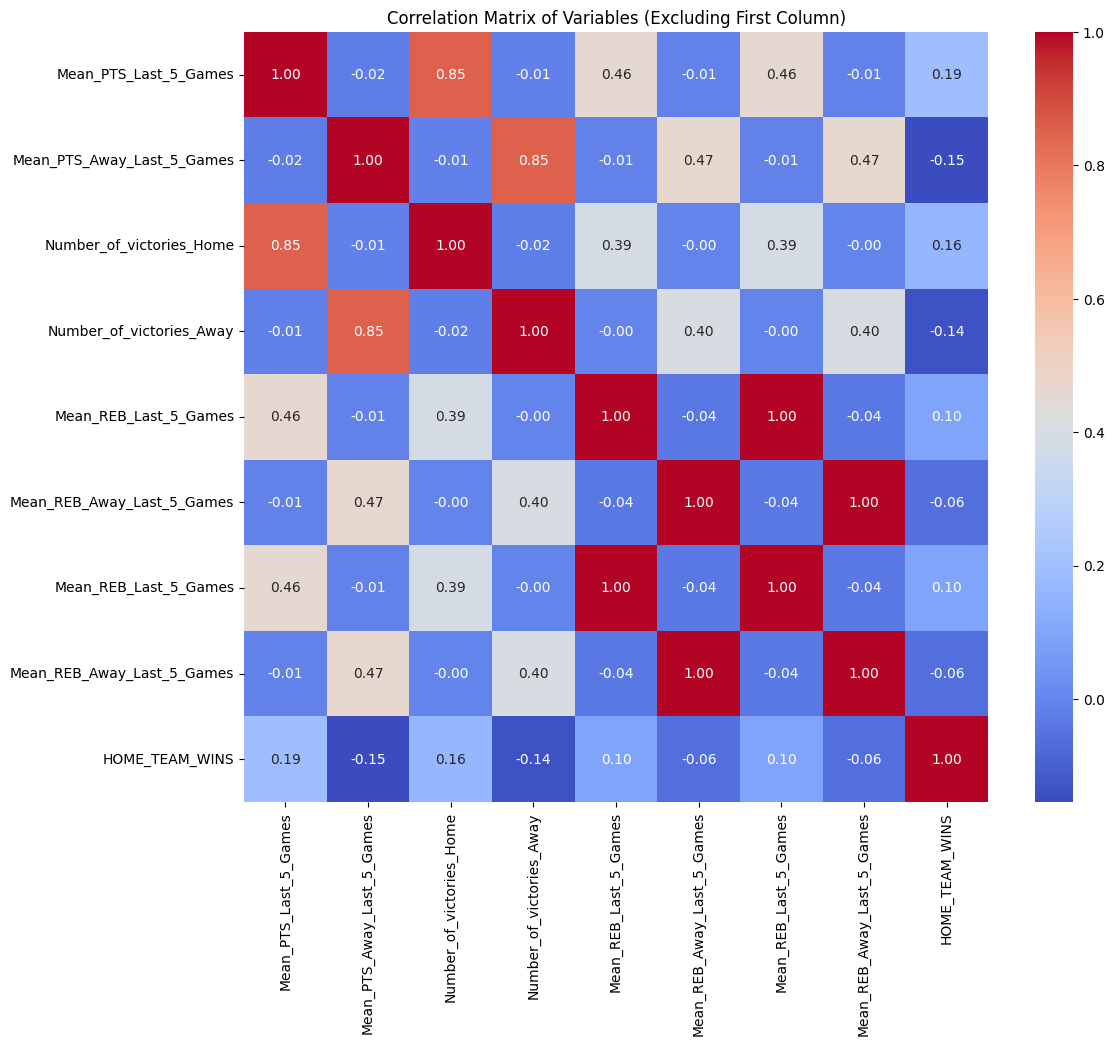

In [ ]:
correlation_matrix = merged_df.corr()

# Create a heatmap of the correlation matrix
plt.figure(figsize=(12, 10))  # Adjust figure size as needed
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Variables (Excluding First Column)')
plt.show()

In [22]:
# average assists delta in the 5 previous games

def get_mean_assists(df):
       # Create an empty list to store the results
    results = []

    for index, row in df_sorted.iterrows():
        game_id = row['GAME_ID']
        home_team_id = row['HOME_TEAM_ID']
        away_team_id = row['VISITOR_TEAM_ID']
        game_date = row['GAME_DATE_EST']
        home_wins = row["HOME_TEAM_WINS"]

        # Find the 5 previous games for the same home team
        previous_games_home = df_sorted[
            (df_sorted['GAME_DATE_EST'] < game_date) &
            ((df_sorted['HOME_TEAM_ID'] == home_team_id) | (df_sorted['VISITOR_TEAM_ID'] == home_team_id)) &
            (df_sorted['GAME_ID'] != game_id)
        ].sort_values(by='GAME_DATE_EST', ascending=False).head(5)

        # same away team
        previous_games_away = df_sorted[
            (df_sorted['GAME_DATE_EST'] < game_date) &
            ((df_sorted['HOME_TEAM_ID'] == away_team_id) | (df_sorted['VISITOR_TEAM_ID'] == away_team_id)) &
            (df_sorted['GAME_ID'] != game_id)
        ].sort_values(by='GAME_DATE_EST', ascending=False).head(5)

        # Calculate the mean of rebounds_home or rebounds_away for previous games for home team
        previous_game_stats_home = []
        for prev_index, prev_row in previous_games_home.iterrows():
          if prev_row['HOME_TEAM_ID'] == home_team_id:
            previous_game_stats_home.append(prev_row['AST_home']-prev_row['AST_away'])
          else:
            previous_game_stats_home.append(prev_row['AST_away']-prev_row['AST_home'])

        mean_previous_ast_home = sum(previous_game_stats_home) / len(previous_game_stats_home) if len(previous_game_stats_home)==5 else None

        # Calculate the mean of PTS_home or PTS_away for previous games for home team
        previous_game_stats_away = []
        for prev_index, prev_row in previous_games_away.iterrows():
          if prev_row['HOME_TEAM_ID'] == away_team_id:
            previous_game_stats_away.append(prev_row['AST_home']-prev_row['AST_away'])
          else:
            previous_game_stats_away.append(prev_row['AST_away']-prev_row['AST_home'])

        mean_previous_ast_away = sum(previous_game_stats_away) / len(previous_game_stats_away) if len(previous_game_stats_away)==5 else None

        #####################################################################################################################################

        results.append({
            'GAME_ID': game_id,
            'HOME_TEAM_ID': home_team_id,
            'VISITOR_TEAM_ID': away_team_id,
            'GAME_DATE_EST': game_date,
            'Mean_AST_Last_5_Games': mean_previous_ast_home,
            'Mean_AST_Away_Last_5_Games': mean_previous_ast_away,
            'HOME_TEAM_WINS': home_wins
        })

    return pd.DataFrame(results)

  # Create the new DataFrame with previous game statistics
mean_assists = get_mean_assists(df)

# Display the resulting DataFrame
print(mean_assists.info)

<bound method DataFrame.info of         GAME_ID  HOME_TEAM_ID  VISITOR_TEAM_ID GAME_DATE_EST  \
0      10300001    1610612762       1610612742    2003-10-05   
1      10300002    1610612763       1610612749    2003-10-06   
2      10300009    1610612758       1610612746    2003-10-07   
3      10300008    1610612756       1610612751    2003-10-07   
4      10300007    1610612748       1610612755    2003-10-07   
...         ...           ...              ...           ...   
26518  22200468    1610612737       1610612741    2022-12-21   
26519  22200466    1610612739       1610612749    2022-12-21   
26520  22200471    1610612752       1610612761    2022-12-21   
26521  22200478    1610612762       1610612764    2022-12-22   
26522  22200477    1610612740       1610612759    2022-12-22   

       Mean_AST_Last_5_Games  Mean_AST_Away_Last_5_Games  HOME_TEAM_WINS  
0                        NaN                         NaN               1  
1                        NaN                     

In [24]:
# mean (on last five games) FT_PCT home/away

def get_mean_FT_PCT(df):
    # Create an empty list to store the results
    results = []

    for index, row in df_sorted.iterrows():
        game_id = row['GAME_ID']
        home_team_id = row['HOME_TEAM_ID']
        away_team_id = row['VISITOR_TEAM_ID']
        game_date = row['GAME_DATE_EST']
        home_wins = row["HOME_TEAM_WINS"]

        # Find the 5 previous games for the same home team
        previous_games_home = df_sorted[
            (df_sorted['GAME_DATE_EST'] < game_date) &
            ((df_sorted['HOME_TEAM_ID'] == home_team_id) | (df_sorted['VISITOR_TEAM_ID'] == home_team_id)) &
            (df_sorted['GAME_ID'] != game_id)
        ].sort_values(by='GAME_DATE_EST', ascending=False).head(5)

        # same away team
        previous_games_away = df_sorted[
            (df_sorted['GAME_DATE_EST'] < game_date) &
            ((df_sorted['HOME_TEAM_ID'] == away_team_id) | (df_sorted['VISITOR_TEAM_ID'] == away_team_id)) &
            (df_sorted['GAME_ID'] != game_id)
        ].sort_values(by='GAME_DATE_EST', ascending=False).head(5)

        # Calculate the mean of PTS_home or PTS_away for previous games for home team
        previous_game_stats_home = []
        for prev_index, prev_row in previous_games_home.iterrows():
            previous_game_stats_home.append(prev_row['FT_PCT_home'])

        mean_ft_pct_home = sum(previous_game_stats_home) / len(previous_game_stats_home) if len(previous_game_stats_home)==5 else None

        # Calculate the mean of PTS_home or PTS_away for previous games for home team
        previous_game_stats_away = []
        for prev_index, prev_row in previous_games_away.iterrows():
            previous_game_stats_away.append(prev_row['FT_PCT_home'])

        mean_ft_pct_away = sum(previous_game_stats_away) / len(previous_game_stats_away) if len(previous_game_stats_away)==5 else None

        #####################################################################################################################################

        results.append({
            'GAME_ID': game_id,
            'HOME_TEAM_ID': home_team_id,
            'VISITOR_TEAM_ID': away_team_id,
            'GAME_DATE_EST': game_date,
            'Mean_FT_PCT_Last_5_Games_home': mean_ft_pct_home,
            'Mean_FT_PCT_Last_5_Games_away': mean_ft_pct_away,
            'HOME_TEAM_WINS': home_wins
        })

    return pd.DataFrame(results)

# Create the new DataFrame with previous game statistics
mean_FT_PCT = get_mean_FT_PCT(df)

# Display the resulting DataFrame
print(mean_FT_PCT.info)

<bound method DataFrame.info of         GAME_ID  HOME_TEAM_ID  VISITOR_TEAM_ID GAME_DATE_EST  \
0      10300001    1610612762       1610612742    2003-10-05   
1      10300002    1610612763       1610612749    2003-10-06   
2      10300009    1610612758       1610612746    2003-10-07   
3      10300008    1610612756       1610612751    2003-10-07   
4      10300007    1610612748       1610612755    2003-10-07   
...         ...           ...              ...           ...   
26518  22200468    1610612737       1610612741    2022-12-21   
26519  22200466    1610612739       1610612749    2022-12-21   
26520  22200471    1610612752       1610612761    2022-12-21   
26521  22200478    1610612762       1610612764    2022-12-22   
26522  22200477    1610612740       1610612759    2022-12-22   

       Mean_FT_PCT_Last_5_Games_home  Mean_FT_PCT_Last_5_Games_away  \
0                                NaN                            NaN   
1                                NaN                     

In [25]:
# mean (on last five games) FG_PCT home/away

def get_mean_FG_PCT(df):
    # Create an empty list to store the results
    results = []

    for index, row in df_sorted.iterrows():
        game_id = row['GAME_ID']
        home_team_id = row['HOME_TEAM_ID']
        away_team_id = row['VISITOR_TEAM_ID']
        game_date = row['GAME_DATE_EST']
        home_wins = row["HOME_TEAM_WINS"]

        # Find the 5 previous games for the same home team
        previous_games_home = df_sorted[
            (df_sorted['GAME_DATE_EST'] < game_date) &
            ((df_sorted['HOME_TEAM_ID'] == home_team_id) | (df_sorted['VISITOR_TEAM_ID'] == home_team_id)) &
            (df_sorted['GAME_ID'] != game_id)
        ].sort_values(by='GAME_DATE_EST', ascending=False).head(5)

        # same away team
        previous_games_away = df_sorted[
            (df_sorted['GAME_DATE_EST'] < game_date) &
            ((df_sorted['HOME_TEAM_ID'] == away_team_id) | (df_sorted['VISITOR_TEAM_ID'] == away_team_id)) &
            (df_sorted['GAME_ID'] != game_id)
        ].sort_values(by='GAME_DATE_EST', ascending=False).head(5)

        # Calculate the mean of PTS_home or PTS_away for previous games for home team
        previous_game_stats_home = []
        for prev_index, prev_row in previous_games_home.iterrows():
            previous_game_stats_home.append(prev_row['FG_PCT_home'])

        mean_fg_pct_home = sum(previous_game_stats_home) / len(previous_game_stats_home) if len(previous_game_stats_home)==5 else None

        # Calculate the mean of PTS_home or PTS_away for previous games for home team
        previous_game_stats_away = []
        for prev_index, prev_row in previous_games_away.iterrows():
            previous_game_stats_away.append(prev_row['FG_PCT_home'])

        mean_fg_pct_away = sum(previous_game_stats_away) / len(previous_game_stats_away) if len(previous_game_stats_away)==5 else None

        #####################################################################################################################################

        results.append({
            'GAME_ID': game_id,
            'HOME_TEAM_ID': home_team_id,
            'VISITOR_TEAM_ID': away_team_id,
            'GAME_DATE_EST': game_date,
            'Mean_FG_PCT_Last_5_Games_home': mean_fg_pct_home,
            'Mean_FG_PCT_Last_5_Games_away': mean_fg_pct_away,
            'HOME_TEAM_WINS': home_wins
        })

    return pd.DataFrame(results)

# Create the new DataFrame with previous game statistics
mean_FG_PCT = get_mean_FG_PCT(df)

# Display the resulting DataFrame
print(mean_FG_PCT.info)

<bound method DataFrame.info of         GAME_ID  HOME_TEAM_ID  VISITOR_TEAM_ID GAME_DATE_EST  \
0      10300001    1610612762       1610612742    2003-10-05   
1      10300002    1610612763       1610612749    2003-10-06   
2      10300009    1610612758       1610612746    2003-10-07   
3      10300008    1610612756       1610612751    2003-10-07   
4      10300007    1610612748       1610612755    2003-10-07   
...         ...           ...              ...           ...   
26518  22200468    1610612737       1610612741    2022-12-21   
26519  22200466    1610612739       1610612749    2022-12-21   
26520  22200471    1610612752       1610612761    2022-12-21   
26521  22200478    1610612762       1610612764    2022-12-22   
26522  22200477    1610612740       1610612759    2022-12-22   

       Mean_FG_PCT_Last_5_Games_home  Mean_FG_PCT_Last_5_Games_away  \
0                                NaN                            NaN   
1                                NaN                     

In [26]:
# mean (on last five games) FG3_PCT home/away

def get_mean_FG3_PCT(df):
    # Create an empty list to store the results
    results = []

    for index, row in df_sorted.iterrows():
        game_id = row['GAME_ID']
        home_team_id = row['HOME_TEAM_ID']
        away_team_id = row['VISITOR_TEAM_ID']
        game_date = row['GAME_DATE_EST']
        home_wins = row["HOME_TEAM_WINS"]

        # Find the 5 previous games for the same home team
        previous_games_home = df_sorted[
            (df_sorted['GAME_DATE_EST'] < game_date) &
            ((df_sorted['HOME_TEAM_ID'] == home_team_id) | (df_sorted['VISITOR_TEAM_ID'] == home_team_id)) &
            (df_sorted['GAME_ID'] != game_id)
        ].sort_values(by='GAME_DATE_EST', ascending=False).head(5)

        # same away team
        previous_games_away = df_sorted[
            (df_sorted['GAME_DATE_EST'] < game_date) &
            ((df_sorted['HOME_TEAM_ID'] == away_team_id) | (df_sorted['VISITOR_TEAM_ID'] == away_team_id)) &
            (df_sorted['GAME_ID'] != game_id)
        ].sort_values(by='GAME_DATE_EST', ascending=False).head(5)

        # Calculate the mean of PTS_home or PTS_away for previous games for home team
        previous_game_stats_home = []
        for prev_index, prev_row in previous_games_home.iterrows():
            previous_game_stats_home.append(prev_row['FG3_PCT_home'])

        mean_fg3_pct_home = sum(previous_game_stats_home) / len(previous_game_stats_home) if len(previous_game_stats_home)==5 else None

        # Calculate the mean of PTS_home or PTS_away for previous games for home team
        previous_game_stats_away = []
        for prev_index, prev_row in previous_games_away.iterrows():
            previous_game_stats_away.append(prev_row['FG3_PCT_home'])

        mean_fg3_pct_away = sum(previous_game_stats_away) / len(previous_game_stats_away) if len(previous_game_stats_away)==5 else None

        #####################################################################################################################################

        results.append({
            'GAME_ID': game_id,
            'HOME_TEAM_ID': home_team_id,
            'VISITOR_TEAM_ID': away_team_id,
            'GAME_DATE_EST': game_date,
            'Mean_FG3_PCT_Last_5_Games_home': mean_fg3_pct_home,
            'Mean_FG3_PCT_Last_5_Games_away': mean_fg3_pct_away,
            'HOME_TEAM_WINS': home_wins
        })

    return pd.DataFrame(results)

# Create the new DataFrame with previous game statistics
mean_FG3_PCT = get_mean_FG3_PCT(df)

# Display the resulting DataFrame
print(mean_FG3_PCT.info)

<bound method DataFrame.info of         GAME_ID  HOME_TEAM_ID  VISITOR_TEAM_ID GAME_DATE_EST  \
0      10300001    1610612762       1610612742    2003-10-05   
1      10300002    1610612763       1610612749    2003-10-06   
2      10300009    1610612758       1610612746    2003-10-07   
3      10300008    1610612756       1610612751    2003-10-07   
4      10300007    1610612748       1610612755    2003-10-07   
...         ...           ...              ...           ...   
26518  22200468    1610612737       1610612741    2022-12-21   
26519  22200466    1610612739       1610612749    2022-12-21   
26520  22200471    1610612752       1610612761    2022-12-21   
26521  22200478    1610612762       1610612764    2022-12-22   
26522  22200477    1610612740       1610612759    2022-12-22   

       Mean_FG3_PCT_Last_5_Games_home  Mean_FG3_PCT_Last_5_Games_away  \
0                                 NaN                             NaN   
1                                 NaN                